In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , roc_curve, auc

In [26]:
# Load the data
features_df = pd.read_csv('preprocessed_data.csv')
features_names=features_df.columns.tolist()
targets_df = pd.read_csv('data_target.csv')
target_names = targets_df.columns.tolist()
# Combine features and targets
full_df = pd.concat([features_df, targets_df], axis=1)

In [27]:
def explore_data(df):
    """Comprehensive data exploration function"""
    print("Dataset Shape:", df.shape)
    
    # Basic information
    print("\n--- Basic Information ---")
    print(df.info())
    
    # Descriptive statistics
    print("\n--- Descriptive Statistics ---")
    print(df.describe())
    
    # Missing values
    print("\n--- Missing Values ---")
    print(df.isnull().sum())
    
    # Feature distribution
    print("\n--- Feature Distributions ---")
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, 10))
    df[numeric_cols].hist(bins=20)
    plt.tight_layout()
    plt.show()
    
    # Correlation of features
    plt.figure(figsize=(12, 10))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()

Dataset Shape: (100000, 15)

--- Basic Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Sexe                  100000 non-null  float64
 1   Age                   100000 non-null  int64  
 2   Tabac                 100000 non-null  int64  
 3   Sport                 100000 non-null  int64  
 4   Alimentation          100000 non-null  int64  
 5   Etat_habitude         100000 non-null  float64
 6   Categorie_antecedent  100000 non-null  float64
 7   Type_antecedent       100000 non-null  int64  
 8   Motif_hosp            100000 non-null  int64  
 9   EtatDeSanteGeneral    100000 non-null  float64
 10  ID_Vaccin             100000 non-null  int64  
 11  Diabete               100000 non-null  int64  
 12  Hypertension          100000 non-null  int64  
 13  Cancer_sein           100000 non-null  int64  
 14

<Figure size 1500x1000 with 0 Axes>

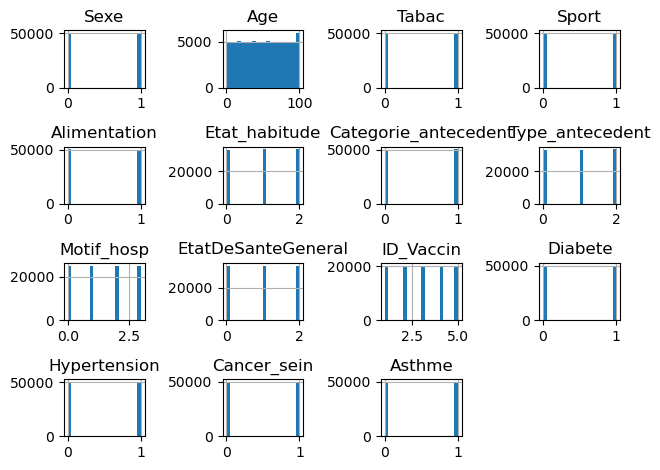

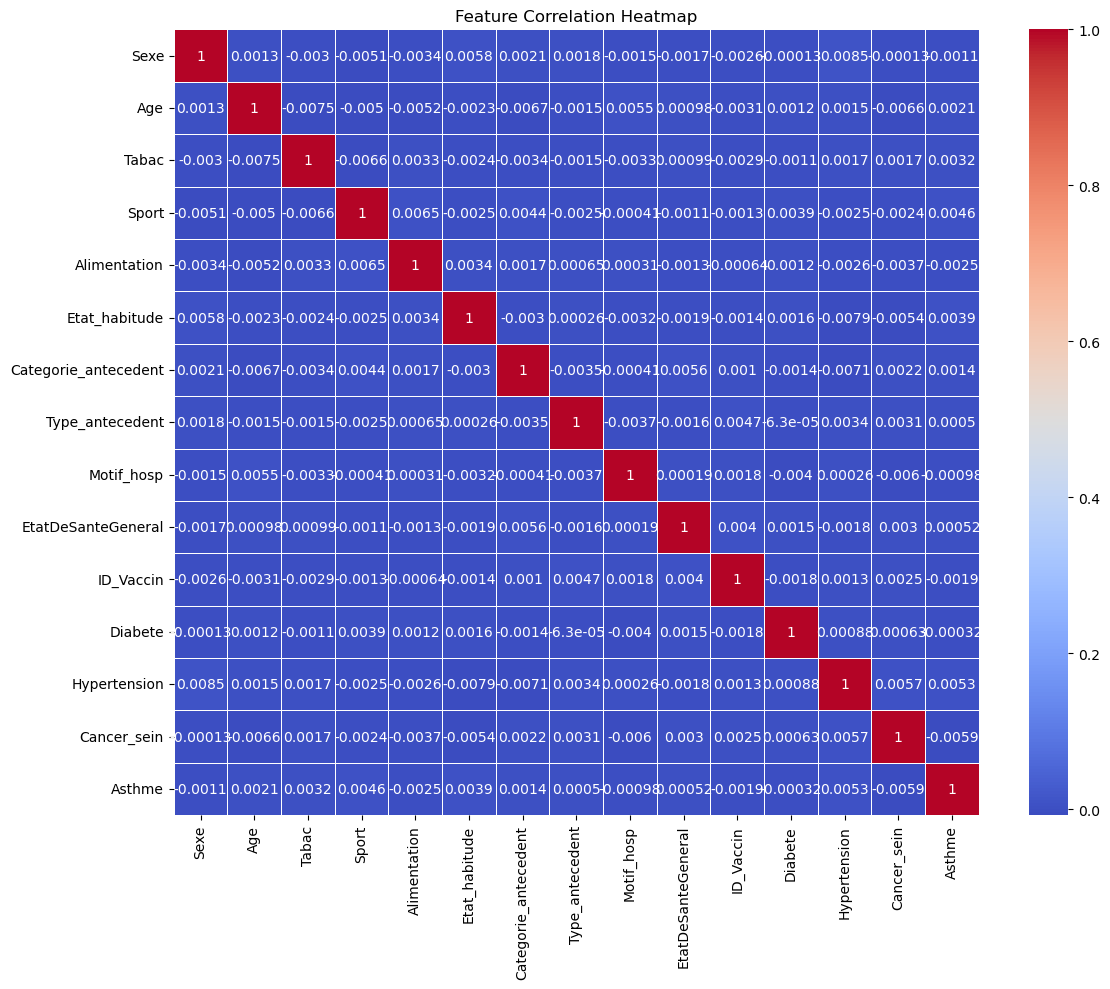

In [28]:
# Explore the data
explore_data(full_df)

In [60]:
def prepare_ml_data(features_df, targets_df):
    """Prepare data for multi-label classification"""
    X = features_df.values
    y = targets_df.values
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler  = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test  = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [61]:
# Prepare machine learning data
X_train, X_test, y_train, y_test = prepare_ml_data(features_df, targets_df)

In [62]:
X_train

array([[ 1.00197695,  0.51858489,  1.00363159, ..., -1.33921172,
         1.22350625,  0.70518614],
       [-0.99802695,  1.44596797,  1.00363159, ...,  0.4479826 ,
        -1.23237813, -1.42089638],
       [-0.99802695, -0.82096845, -0.99638155, ...,  1.34157975,
        -1.23237813, -0.00350804],
       ...,
       [-0.99802695,  0.8620601 , -0.99638155, ..., -1.33921172,
         1.22350625, -0.00350804],
       [ 1.00197695, -1.37052879,  1.00363159, ..., -1.33921172,
        -0.00443594, -0.00350804],
       [ 1.00197695,  1.48031549, -0.99638155, ..., -1.33921172,
        -0.00443594, -0.00350804]])

In [63]:
# Train a multi-label Random Forest Classifier
def train_multi_label_classifier(X_train, X_test, y_train, y_test):
    """Train a multi-label random forest classifier"""
    from sklearn.multioutput import MultiOutputClassifier
    
    # Create and train the multi-label classifier
    rf_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
    rf_classifier.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = rf_classifier.predict(X_test)
    
    print("--- Multi-Label Classification Report ---")
    for i, disease in enumerate(['Diabete', 'Hypertension', 'Cancer_sein', 'Asthme']):
        print(f"\n{disease} Classification Report:")
        print(classification_report(y_test[:, i], y_pred[:, i]))
    
    return rf_classifier , y_pred

In [64]:
# Train the classifier
multi_label_model ,y_pred= train_multi_label_classifier(X_train, X_test, y_train, y_test)

--- Multi-Label Classification Report ---

Diabete Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51     10146
           1       0.50      0.50      0.50      9854

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000


Hypertension Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     10002
           1       0.50      0.50      0.50      9998

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000


Cancer_sein Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      9982
           1       0.50      0.49      0.50     10018

    accuracy                       

In [65]:
def visualize_results(y_true, y_pred, disease_names):
    """
    Comprehensive visualization of machine learning results
    
    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - disease_names: List of disease names
    """
    # 1. Confusion Matrix Visualization
    plt.figure(figsize=(20, 5))
    for i, disease in enumerate(disease_names):
        plt.subplot(1, len(disease_names), i+1)
        cm = confusion_matrix(y_true[:, i], y_pred[:, i])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['No', 'Yes'], 
                    yticklabels=['No', 'Yes'])
        plt.title(f'Confusion Matrix - {disease}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # 2. ROC Curve for Each Disease
    plt.figure(figsize=(20, 5))
    for i, disease in enumerate(disease_names):
        plt.subplot(1, len(disease_names), i+1)
        
        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, color='darkorange', 
                 lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {disease}')
        plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # 3. Performance Metrics Bar Plot
    def extract_metrics(y_true, y_pred, disease_names):
        metrics = []
        for i, disease in enumerate(disease_names):
            report = classification_report(y_true[:, i], y_pred[:, i], output_dict=True)
            metrics.append({
                'Disease': disease,
                'Precision': report['weighted avg']['precision'],
                'Recall': report['weighted avg']['recall'],
                'F1-Score': report['weighted avg']['f1-score']
            })
        return pd.DataFrame(metrics)

    metrics_df = extract_metrics(y_true, y_pred, disease_names)
    
    plt.figure(figsize=(12, 6))
    metrics_to_plot = ['Precision', 'Recall', 'F1-Score']
    
    for i, metric in enumerate(metrics_to_plot):
        plt.subplot(1, 3, i+1)
        sns.barplot(x='Disease', y=metric, data=metrics_df)
        plt.title(f'{metric} by Disease')
        plt.xticks(rotation=45)
        plt.tight_layout()
    plt.show()
   
    return metrics_df


In [66]:
 def plot_feature_importance(model, feature_names):
        importances = model.estimators_[0].feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(10, 6))
        plt.title("Feature Importances")
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), 
                   [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()

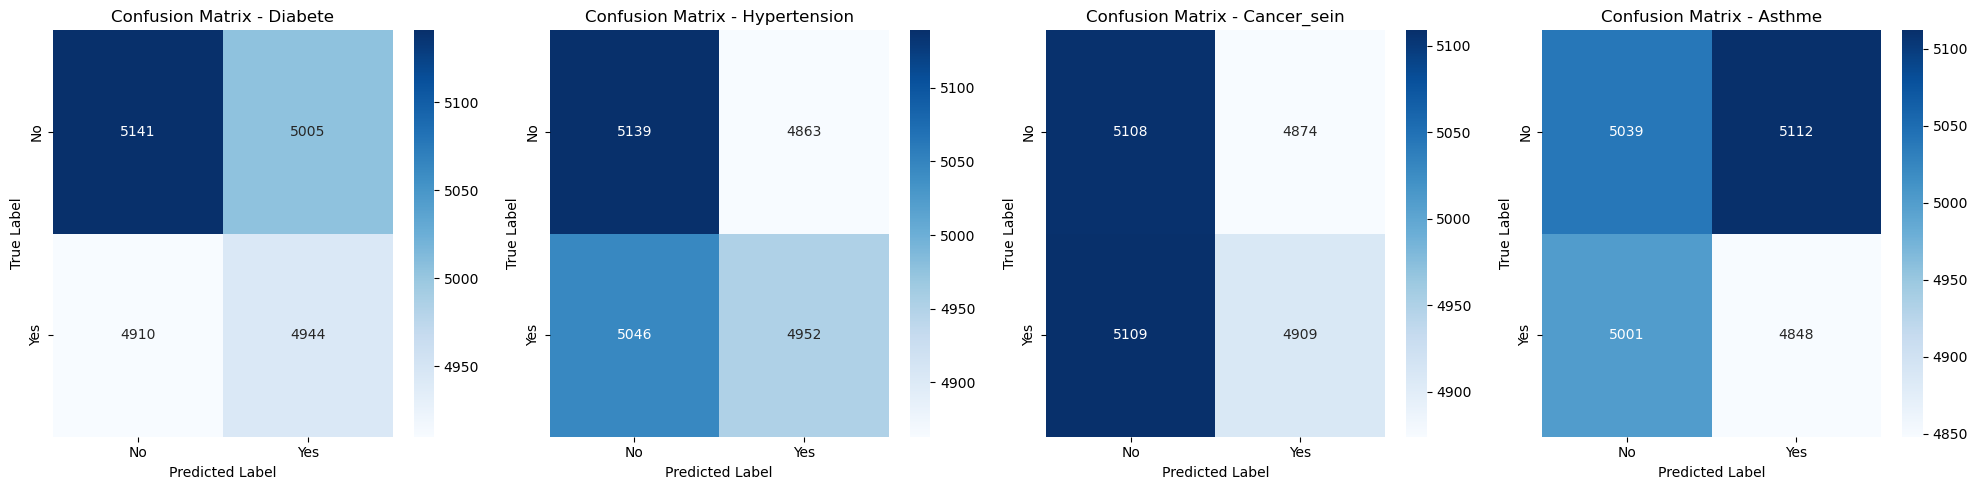

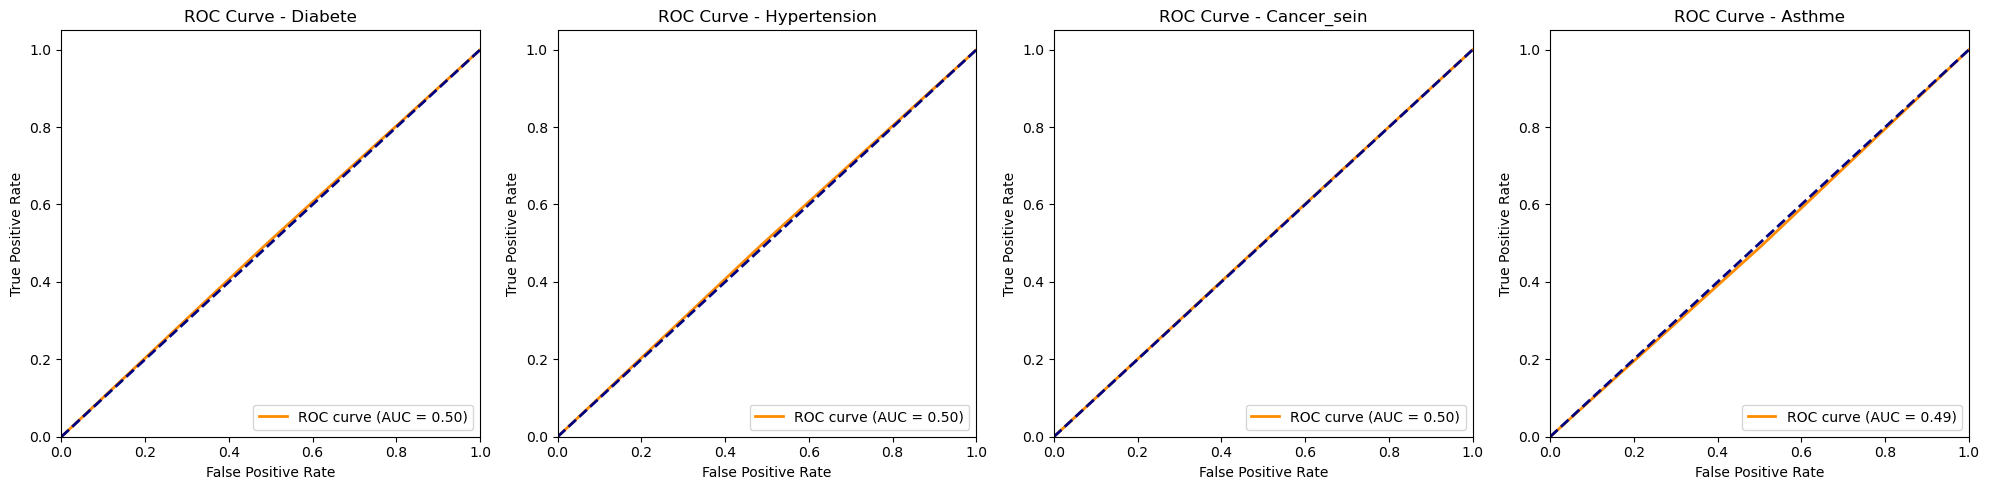

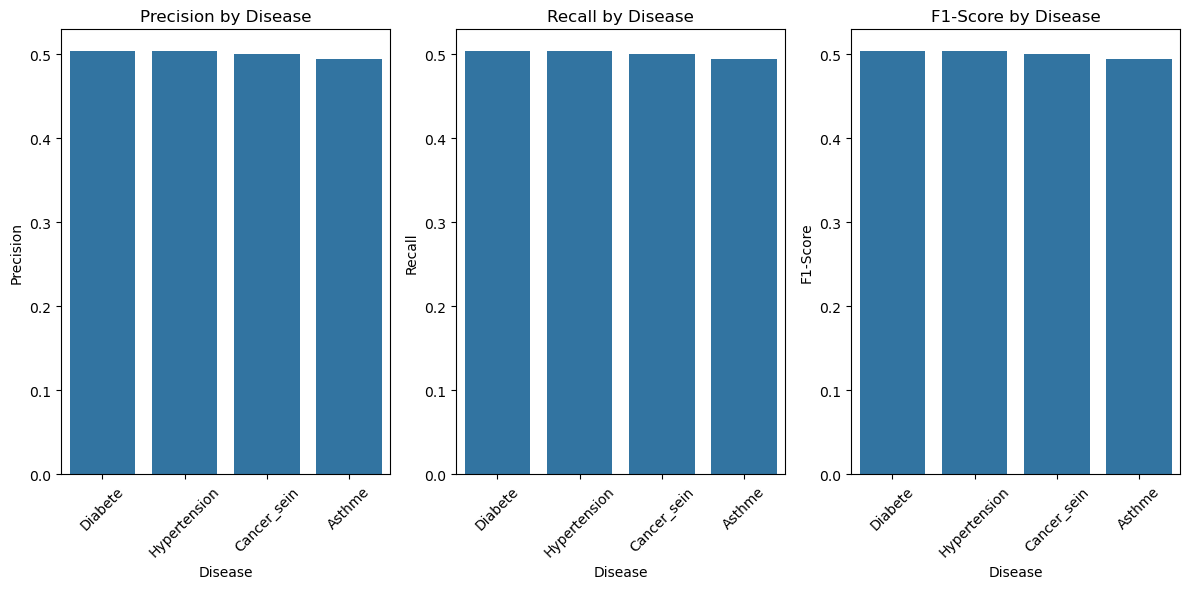

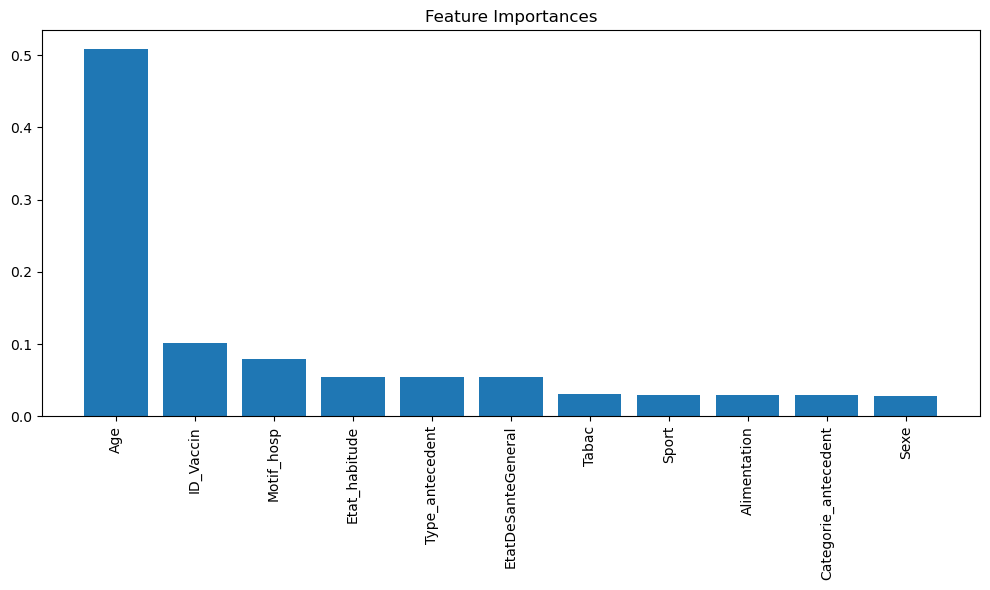

In [67]:
visualize_results(y_test, y_pred,target_names)
plot_feature_importance(multi_label_model,features_names)

# Test With New Data

In [78]:
new_patient = pd.DataFrame([[
    1, 45, 0, 1, 1, 0, 1, 0, 1, 2, 1 
]], columns=features_df.columns)  

In [79]:
new_patient

,Sexe,Age,Tabac,Sport,Alimentation,Etat_habitude,Categorie_antecedent,Type_antecedent,Motif_hosp,EtatDeSanteGeneral,ID_Vaccin
0,1,45,0,1,1,0,1,0,1,2,1


In [80]:
new_prediction_porentage = multi_label_model.predict_proba(new_patient.to_numpy())
new_prediction = multi_label_model.predict(new_patient.to_numpy())

In [81]:
new_prediction

array([[0, 1, 0, 1]], dtype=int64)

In [82]:
new_prediction_porentage

[array([[0.52, 0.48]]),
 array([[0.3, 0.7]]),
 array([[0.55, 0.45]]),
 array([[0.36, 0.64]])]